In [1]:
!pip install scikit-learn==1.2.2

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install imblearn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("Machine Learning Revision/creditcard.csv")

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
data.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
data.drop_duplicates(inplace = True)

In [9]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
print('There is no frauds:' , round(data['Class'].value_counts()[0] / len(data) , 5))
print('There is frauds:' , round(data['Class'].value_counts()[1] / len(data) , 5))

There is no frauds: 0.99827
There is frauds: 0.00173


<Axes: xlabel='Class', ylabel='count'>

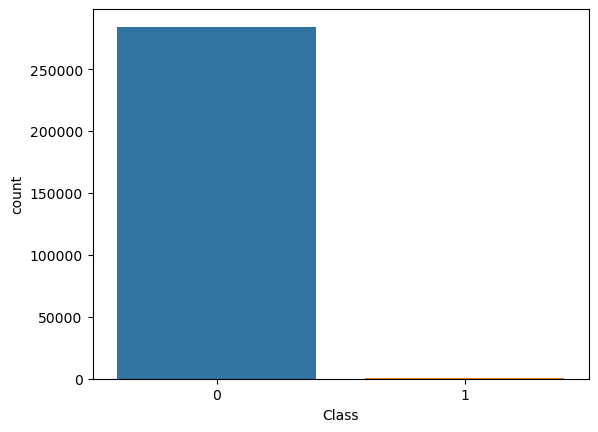

In [11]:
sns.countplot(x ='Class' , data=data)

In [12]:
data['Amount']

0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 284807, dtype: float64

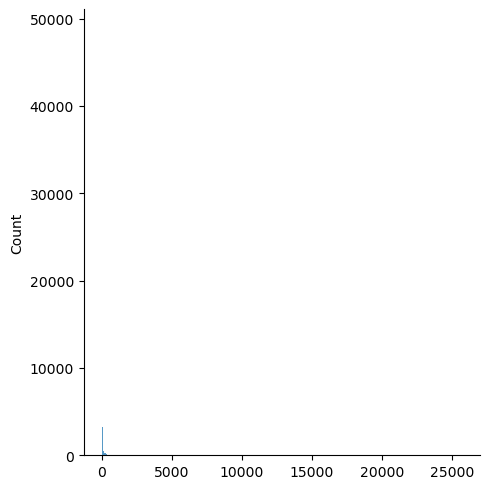

In [13]:
amount_values = data['Amount'].values
time_values = data['Time']. values

sns.displot(amount_values)

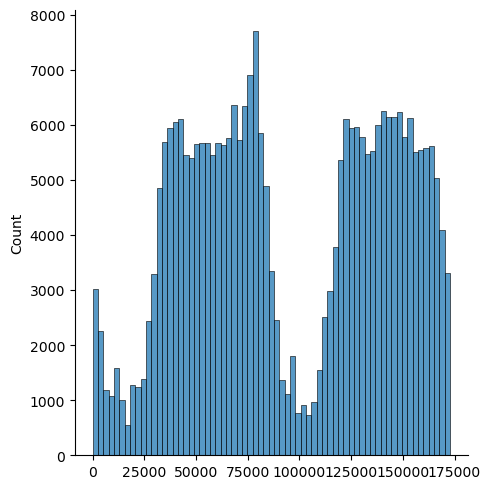

In [14]:
sns.displot(time_values)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc = StandardScaler()
data[['Amount' ,'Time']] = sc.fit_transform(data[['Amount' ,'Time']])

In [17]:
x = data.drop('Class' , axis = 1)
y= data['Class']

from sklearn.model_selection import train_test_split
x_train , x_test ,y_train , y_test= train_test_split(x , y , train_size=0.8 , random_state=42)

In [18]:
y_train.value_counts()

0    227451
1       394
Name: Class, dtype: int64

In [19]:
y_test.value_counts()

0    56864
1       98
Name: Class, dtype: int64

In [21]:
data= data.sample(frac = 1)
fraud_df = data[data['Class'] == 1]
no_fraud_df = data[data['Class'] ==0][:len(fraud_df)]
new_df = pd.concat([fraud_df , no_fraud_df])
new_df = new_df.sample(frac=1) 
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
37460,-1.176103,-8.164069,4.635965,-3.910798,-0.110987,-5.057069,-0.775761,-3.550786,5.305288,0.359102,...,0.113622,-0.217779,-0.095296,0.611372,0.738774,0.372450,-0.132885,0.016547,-0.154365,0
77274,-0.796808,-0.643595,1.161421,1.330706,1.244045,0.089871,0.012932,0.532739,0.162036,0.016282,...,-0.079408,0.184238,-0.147927,0.074996,-0.067584,-0.216015,0.535406,0.264824,-0.327682,0
4742,-1.908435,0.096212,0.858520,0.713360,0.849611,0.065185,-0.531595,0.203406,0.032210,1.691920,...,-0.230926,-0.030370,0.113332,0.266241,-0.411512,0.257749,0.217155,0.014254,-0.304013,0
204064,0.848237,0.232512,0.938944,-4.647780,3.079844,-1.902655,-1.041408,-1.020407,0.547069,-1.105990,...,0.911373,1.042929,0.999394,0.901260,-0.452093,0.192959,0.180859,-0.029315,1.026110,1
119781,-0.405004,-2.866364,2.346949,-4.053307,3.983359,-3.463186,-1.280953,-4.474764,1.216655,-2.309829,...,1.049732,0.475840,0.404480,0.282030,-0.506901,-0.371741,0.615257,0.803163,0.144652,1


In [22]:
fraud_df.shape , no_fraud_df.shape

((473, 31), (473, 31))

<Axes: xlabel='Class', ylabel='count'>

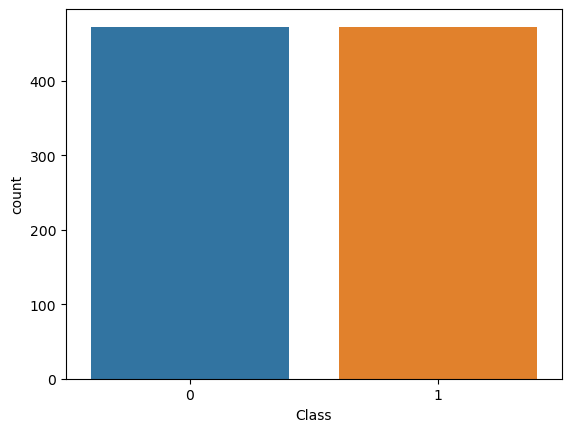

In [23]:
sns.countplot(x='Class', data=new_df)

<Axes: >

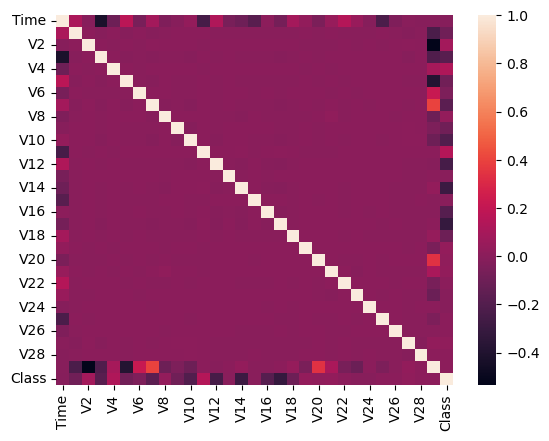

In [24]:
df_corr = data.corr()
newdf_corr = new_df.corr()
sns.heatmap(df_corr)

<Axes: >

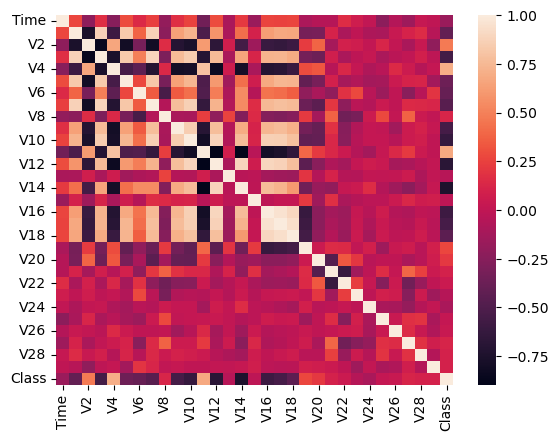

In [25]:
sns.heatmap(newdf_corr)

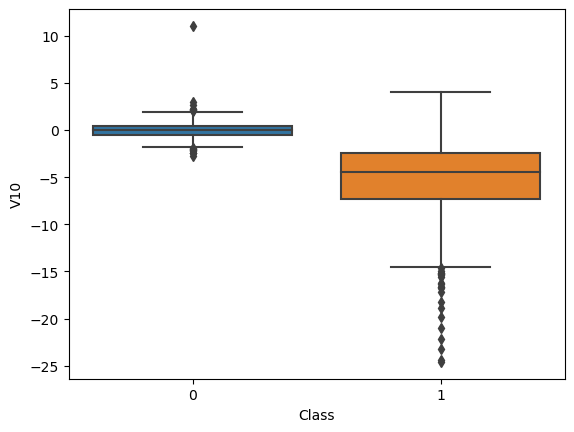

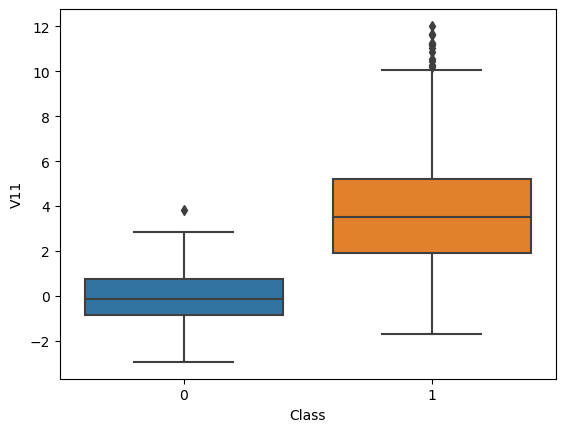

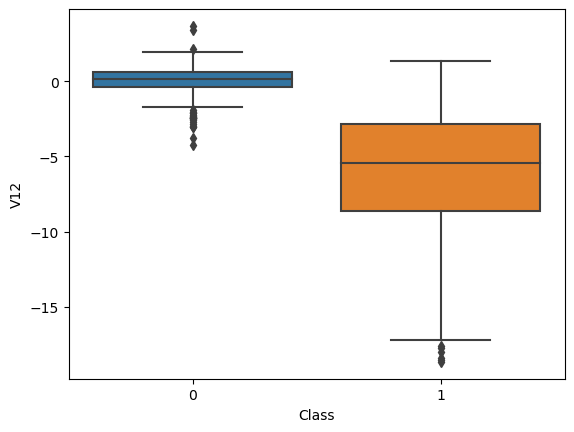

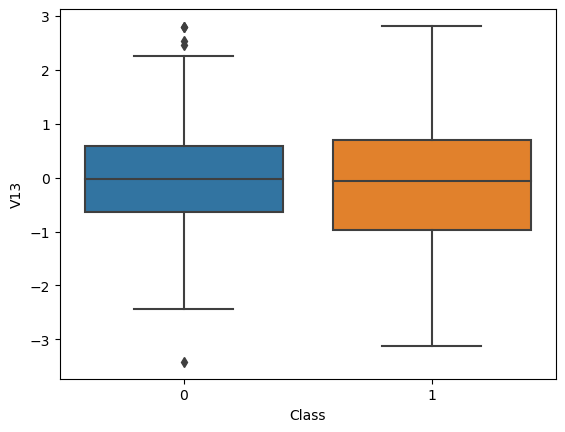

In [26]:
cols= ['V10' , 'V11' , 'V12' , 'V13']
for c in cols:
    sns.boxplot(x='Class' , y=c , data=new_df)
    plt.show()

In [27]:
# v10 = new_df['V10']
# q25, q75 = np.percentile(v10 , 25),np.percentile(v10 , 75)
# IQRv10 = q75 - q25
# cut_off = IQRv10*1.5
# upper = q75 + cut_off
# lower = q25 - cut_off
# new_df = new_df[(new_df['V10'] > lower) & (new_df['V10'] < upper)]

<Axes: xlabel='Class', ylabel='V10'>

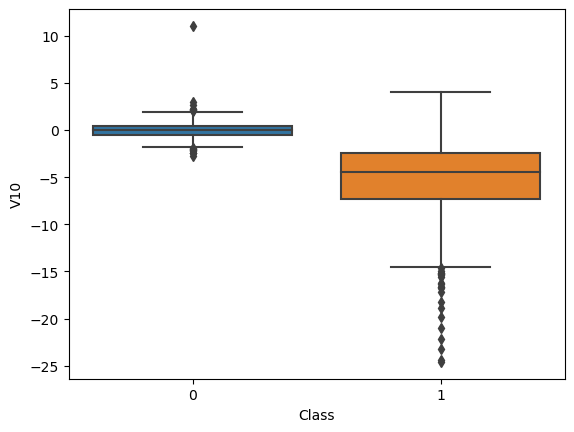

In [28]:
sns.boxplot(x = 'Class' , y='V10' , data=new_df)

In [29]:
# def outlier(data , col):
#     v = data[col]
#     q25 , q75 = np. percentile(v , 25), np.percentile(v , 75)
#     IQRv10 = q75 - q25
#     cut_off = IQRv10*1.5
#     upper = q75 + cut_off
#     lower = q25 - cut_off
#     data = data[(data[col] > lower) & (data[col] < upper)]
#     return data

# cols = new_df.columns.drop('Class')
# for c in cols:
#     new_df = outlier(new_df, c)

In [30]:
new_df.shape

(946, 31)

In [67]:
from sklearn.decomposition import PCA
from imblearn.pipeline import make_pipeline

In [32]:
x = new_df.drop(['Class'] , axis=1)
y = new_df['Class']

pca = PCA(n_components = 2 , random_state =42)
x_reduce_pca=pca.fit_transform(x.values)

In [33]:
import matplotlib.patches as mpatches

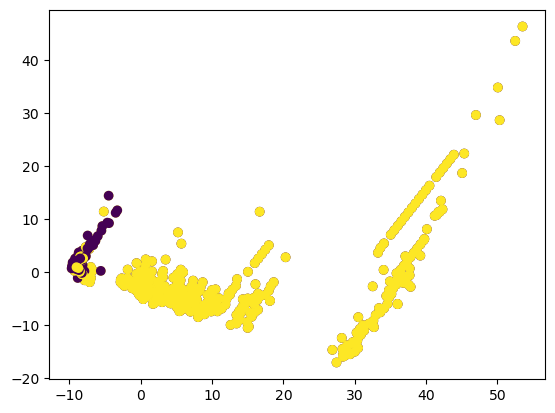

In [34]:
plt.scatter(x_reduce_pca[: , 0], x_reduce_pca[: ,1] , c=(y == 0) , label='No Fraud')
plt.scatter(x_reduce_pca[: , 0], x_reduce_pca[: ,1] , c=(y ==1 ) , label='Fraud')

In [35]:
x_train , x_test , y_train, y_test = train_test_split(x.values , y.values , train_size=0.8 , random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [37]:
Classifiers ={
    'Logistic':LogisticRegression(),
    'Tree' : DecisionTreeClassifier(),
    'KNN' :KNeighborsClassifier(),
    'SVM': SVC()
}

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [39]:
for idx , classifier in Classifiers.items():
    classifier.fit(x_train , y_train)
    scoring_val = cross_val_score(classifier ,x_train , y_train , cv=5)
    print('Classifier:' , classifier.__class__ , round(scoring_val.mean() , 5))
    

Classifier: <class 'sklearn.linear_model._logistic.LogisticRegression'> 0.93654
Classifier: <class 'sklearn.tree._classes.DecisionTreeClassifier'> 0.90349
Classifier: <class 'sklearn.neighbors._classification.KNeighborsClassifier'> 0.92593
Classifier: <class 'sklearn.svm._classes.SVC'> 0.93123


In [40]:
for idx , classifier in Classifiers.items():
    classifier.fit(x_train , y_train)
    y_pred= classifier.predict(x_test)
    scoring_val = cross_val_score(classifier ,x_train , y_train , cv=5)
    
    print(f'{idx} ==> Train == {round(scoring_val.mean() , 5)*100}%' ,end='')
    print(f' and Test == {round(accuracy_score(y_test, y_pred)*100 , 5)}% ')
    

Logistic ==> Train == 93.65400000000001% and Test == 92.10526% 
Tree ==> Train == 89.82% and Test == 88.94737% 
KNN ==> Train == 92.593% and Test == 91.57895% 
SVM ==> Train == 93.123% and Test == 91.05263% 


In [41]:
from  sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [42]:
log_params = {
    
    'penalty':['l1','l2'],
    'C' : [0.001 , 0.01 , 0.1 , 10]
}

grid_log = GridSearchCV(LogisticRegression() , log_params , cv=5)
grid_log.fit(x_train , y_train)
best_params= grid_log.best_params_
best_params

{'C': 0.1, 'penalty': 'l2'}

In [43]:
from sklearn import metrics
from sklearn.metrics import classification_report
def Classification_results(y_true, y_pred):
    # Making the Confusion Matrix
    cm = metrics.confusion_matrix(y_true, y_pred)
    acc = metrics.accuracy_score(y_true, y_pred)
    Auc = metrics.roc_auc_score(y_true, y_pred)
    report = classification_report(y_true, y_pred)
    
    print(f'Confusion Matrix: \n{cm}')
    print(f'accuracy_score: {acc}')
    print(f'roc_auc_score: {Auc}')
    print(f'report: \n{report}')

In [44]:
Classification_results(y_test , y_pred)

Confusion Matrix: 
[[94  1]
 [16 79]]
accuracy_score: 0.9105263157894737
roc_auc_score: 0.9105263157894736
report: 
              precision    recall  f1-score   support

           0       0.85      0.99      0.92        95
           1       0.99      0.83      0.90        95

    accuracy                           0.91       190
   macro avg       0.92      0.91      0.91       190
weighted avg       0.92      0.91      0.91       190



In [45]:
log_model_under_sample = LogisticRegression(**best_params)
log_model_under_sample.fit(x_train , y_train)
y_pred = log_model_under_sample.predict(x_test)
print(f'Train == {round(log_model_under_sample.score(x_train , y_train),5)*100}%' , end='')
print(f' and Test == {round(accuracy_score(y_test , y_pred),5)*100}%')

Train == 94.44399999999999% and Test == 91.579%


In [68]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV

In [88]:
x = data.drop(['Class'] , axis=1)
y= data['Class']

x_train , x_test , y_train, y_test = train_test_split(x.values , y.values , train_size=0.8 , random_state=42)

log_params = {
    
    'penalty':['l1','l2'],
    'C' : [0.001 , 0.01 , 0.1 , 10]
}

rand_log_reg = RandomizedSearchCV(LogisticRegression() , log_params, n_iter=4)

pipline = make_pipeline(
    SMOTE(sampling_strategy='minority'), 
    rand_log_reg
    )
model= pipline.fit(x_train , y_train)
best_params = rand_log_reg.best_params_
best_params

{'penalty': 'l2', 'C': 10}

In [85]:
model_over_sampling = rand_log_reg.best_estimator_

In [86]:
y_pred = model_over_sampling.predict(x_test)
Classification_results(y_test , y_pred)

Confusion Matrix: 
[[55081  1581]
 [    5    79]]
accuracy_score: 0.9720508934550453
roc_auc_score: 0.956286946319949
report: 
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56662
           1       0.05      0.94      0.09        84

    accuracy                           0.97     56746
   macro avg       0.52      0.96      0.54     56746
weighted avg       1.00      0.97      0.98     56746



In [89]:
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [92]:
undersample_model = Sequential([

    Dense(128 , input_shape=(x_train.shape[1], )),
    Dense(64 , activation='relu'),
    Dense(1 , activation='softmax'),
])

undersample_model.compile(Adam(lr=0.001) , loss= 'binary_crossentropy' , metrics =['accuracy'])

undersample_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               3968      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 12289 (48.00 KB)
Trainable params: 12289 (48.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [95]:
undersample_model.fit(x_train , y_train , epochs=2 , batch_size=8 ,validation_split=0.1)

Epoch 1/2
25536/25536 [==============================] - 87s 3ms/step - loss: 0.0056 - accuracy: 0.0018 - val_loss: 0.0024 - val_accuracy: 0.0013
Epoch 2/2
25536/25536 [==============================] - 90s 4ms/step - loss: 0.0052 - accuracy: 0.0018 - val_loss: 0.0031 - val_accuracy: 0.0013


In [96]:
sm = SMOTE(sampling_strategy='minority')
x_sm_train , y_sm_train = sm.fit_resample(x_train , y_train)

In [97]:
oversample_model = Sequential([

    Dense(128 , input_shape=(x_train.shape[1], )),
    Dense(64 , activation='relu'),
    Dense(1 , activation='softmax'),
])

oversample_model.compile(Adam(lr=0.001) , loss= 'binary_crossentropy' , metrics =['accuracy'])

oversample_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               3968      
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 12289 (48.00 KB)
Trainable params: 12289 (48.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [98]:
oversample_model.fit(x_sm_train , y_sm_train , epochs=2 , batch_size=8 ,validation_split=0.1)

Epoch 1/2
50983/50983 [==============================] - 177s 3ms/step - loss: 0.0230 - accuracy: 0.4444 - val_loss: 0.0208 - val_accuracy: 1.0000
Epoch 2/2
50983/50983 [==============================] - 179s 4ms/step - loss: 0.0103 - accuracy: 0.4444 - val_loss: 0.0020 - val_accuracy: 1.0000
